# GlucoSense- AI-Powered Diabetes Detection for Early Intervention

# Project Overview
This project aims to build a machine-learning model that classifies individuals as diabetic or non-diabetic based on early medical indicators. The dataset used for this analysis is the Early Diabetes Classification Dataset from Kaggle, which includes key health features such as glucose levels, BMI, age, and insulin levels. The goal is to predict the likelihood of an individual developing diabetes, providing a valuable tool for early intervention and risk assessment.

# Importing Libraries
In this section, we import all necessary libraries to ensure that we have the tools we need for data manipulation, model building, and evaluation. Keeping all imports centralized helps maintain a clean and organized code structure, making it easier to manage and expand upon the project as needed.

In [236]:
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [237]:
import pandas as pd
data = pd.read_csv('C:\\Users\\dell\\OneDrive\\Desktop\\Rethasvi\\infosys\\diabetesdata.csv')
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [238]:
data.describe()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,48.864542,0.525896,0.494024,0.414343,0.633466,0.466135,0.266932,0.442231,0.505976,0.282869,0.498008,0.446215,0.390438,0.358566,0.175299,0.689243
std,12.526036,0.500327,0.500963,0.493592,0.482820,0.499849,0.443241,0.497644,0.500963,0.451293,0.500995,0.498092,0.488823,0.480538,0.380982,0.463728
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Exploratory data analysis
This Exploratory Data Analysis (EDA) step focuses on preparing data for modeling by addressing:

Missing Values: Identify and impute or remove based on feature relevance.

Outliers: Detect and manage with Z-score or IQR to avoid model bias.

Duplicates: Eliminate duplicates to maintain data uniqueness.

Data Consistency: Standardize data types for reliable model compatibility.

This EDA phase ensures data quality and readiness for accurate modeling.

# Missing values

In [239]:
import pandas as pd
file_path = "C:\\Users\\dell\\OneDrive\\Desktop\\Rethasvi\\infosys\\diabetesdata.csv"
df = pd.read_csv(file_path)
print("Missing values in each column before filling:")
print(df.isnull().sum())

Missing values in each column before filling:
age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64


Summary showing the number of missing values in each column of the dataset. This helps identify which columns had incomplete data.


# Outliers

In [240]:

import pandas as pd
import numpy as np
data = pd.read_csv('C:\\Users\\dell\\OneDrive\\Desktop\\Rethasvi\\infosys\\diabetesdata.csv')
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]
print("Outliers in the 'age' column:")
print(outliers[['age']])
data_no_outliers = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]


Outliers in the 'age' column:
     age
101   90



Removing data points(outliers) could lead to significant loss of important information. Therefore, instead of removing outliers outright, we will carefully analyze the data using histograms and other visualization techniques to understand their distribution.

# Remove Duplicates

In [241]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Drop duplicates if they exist
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicates found.")


Number of duplicate rows: 0
No duplicates found.




The code reads a dataset, removes duplicate rows to keep only unique entries, and then optionally saves the cleaned data to a new file. This is useful for ensuring that the dataset does not contain any repeated records, which can help avoid biased analysis or training if this data is used for machine learning.

# Encoding

In [242]:
import pandas as pd
data = pd.read_csv('C:\\Users\\dell\\OneDrive\\Desktop\\Rethasvi\\infosys\\diabetesdata.csv')
categorical_columns = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns)
print("Encoded dataset:")
print(data_encoded.head())


Encoded dataset:
   age  polyuria  polydipsia  sudden_weight_loss  weakness  polyphagia  \
0   40         0           1                   0         1           0   
1   58         0           0                   0         1           0   
2   41         1           0                   0         1           1   
3   45         0           0                   1         1           1   
4   60         1           1                   1         1           1   

   genital_thrush  visual_blurring  itching  irritability  delayed_healing  \
0               0                0        1             0                1   
1               0                1        0             0                0   
2               0                0        1             0                1   
3               1                0        1             0                1   
4               0                1        1             1                1   

   partial_paresis  muscle_stiffness  alopecia  obesity  class  gende


This code transforms the dataset's categorical data into a numeric format using one-hot encoding, enabling it to be used in machine learning models. The original categorical columns are replaced with multiple binary columns, each representing a unique category. This technique is essential for handling categorical data in data preprocessing.

# Data Cleaning

In [243]:
import pandas as pd
file_path = 'C:\\Users\\dell\\OneDrive\\Desktop\\Rethasvi\\infosys\\diabetesdata.csv'
data = pd.read_csv(file_path)
print("Missing values per column:\n", data.isnull().sum())
binary_columns = data.columns[2:-1]
data[binary_columns] = data[binary_columns].astype(bool)
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)
data = data.drop_duplicates()
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]
data = data.reset_index(drop=True)
print("Cleaned data preview:\n", data.head())
print("Data types after cleaning:\n", data.dtypes)
print("Data shape after cleaning:", data.shape)


Missing values per column:
 age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64
Number of duplicate rows: 0
Cleaned data preview:
    age gender  polyuria  polydipsia  sudden_weight_loss  weakness  polyphagia  \
0   40   Male     False        True               False      True       False   
1   58   Male     False       False               False      True       False   
2   41   Male      True       False               False      True        True   
3   45   Male     False       False                True      True        True   
4   60   Male      True        True                True      True        True   

   genital_th


This code performs data cleaning and preprocessing on a diabetes dataset. It starts by checking for missing values in the dataset, printing the count of missing values per column. It then converts certain binary columns to boolean type, based on their range (0/1). The code checks for and removes any duplicate rows, and then it handles outliers in the 'age' column using the Interquartile Range (IQR) method, filtering out extreme values. Finally, the index is reset after cleaning, and a preview of the cleaned data, its data types, and the shape of the dataset are printed to ensure the cleaning process was successful.

In [244]:
print(data.columns.tolist())

['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class']


In [245]:
data.rename(columns={'ExactColumnName': 'age'}, inplace=True)



# Displaying Histograms

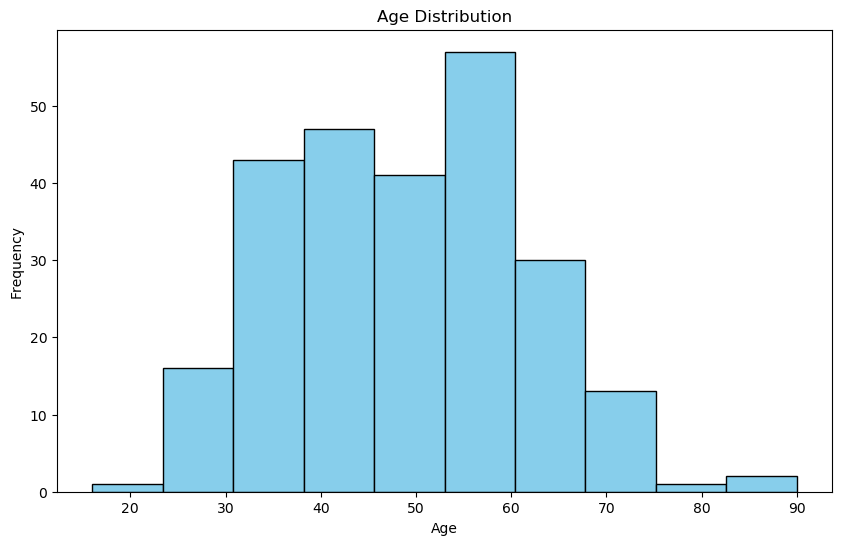

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('C:\\Users\\dell\\OneDrive\\Desktop\\Rethasvi\\infosys\\diabetesdata.csv')
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




The histogram displays the age distribution within the dataset, with the x-axis representing age groups and the y-axis indicating the frequency of individuals in each group. Ages are divided into 10 bins, which group individuals into ranges that reveal the dataset's age spread. The frequency for each bin shows how many individuals fall within each age range, providing insight into which age groups are most or least represented. The bars are styled with a light blue color and black edges to enhance readability.

# Distribution of Age Groups by Diabetes Status

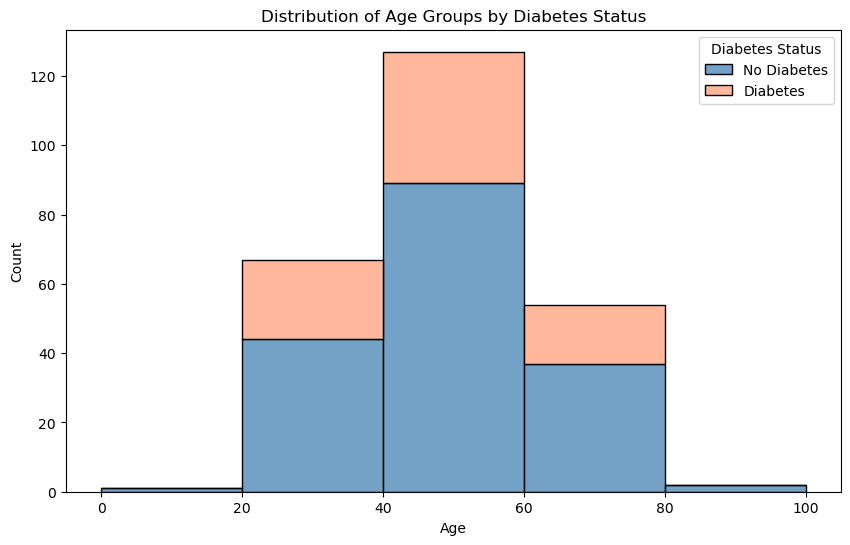

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
bins = range(0, 101, 20)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='class', bins=bins, multiple='stack', palette=['#FFA07A', '#4682B4'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age Groups by Diabetes Status')
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'])
plt.show()



The histogram shows the distribution of age groups for individuals with and without diabetes:

Age groups are divided into bins of 10 years (0-10, 10-20, etc.).
Orange bars represent individuals without diabetes, while blue bars represent individuals with diabetes.
The 40-60 age group has the highest frequency, indicating a larger number of cases in that range for both diabetes and non-diabetes categories.

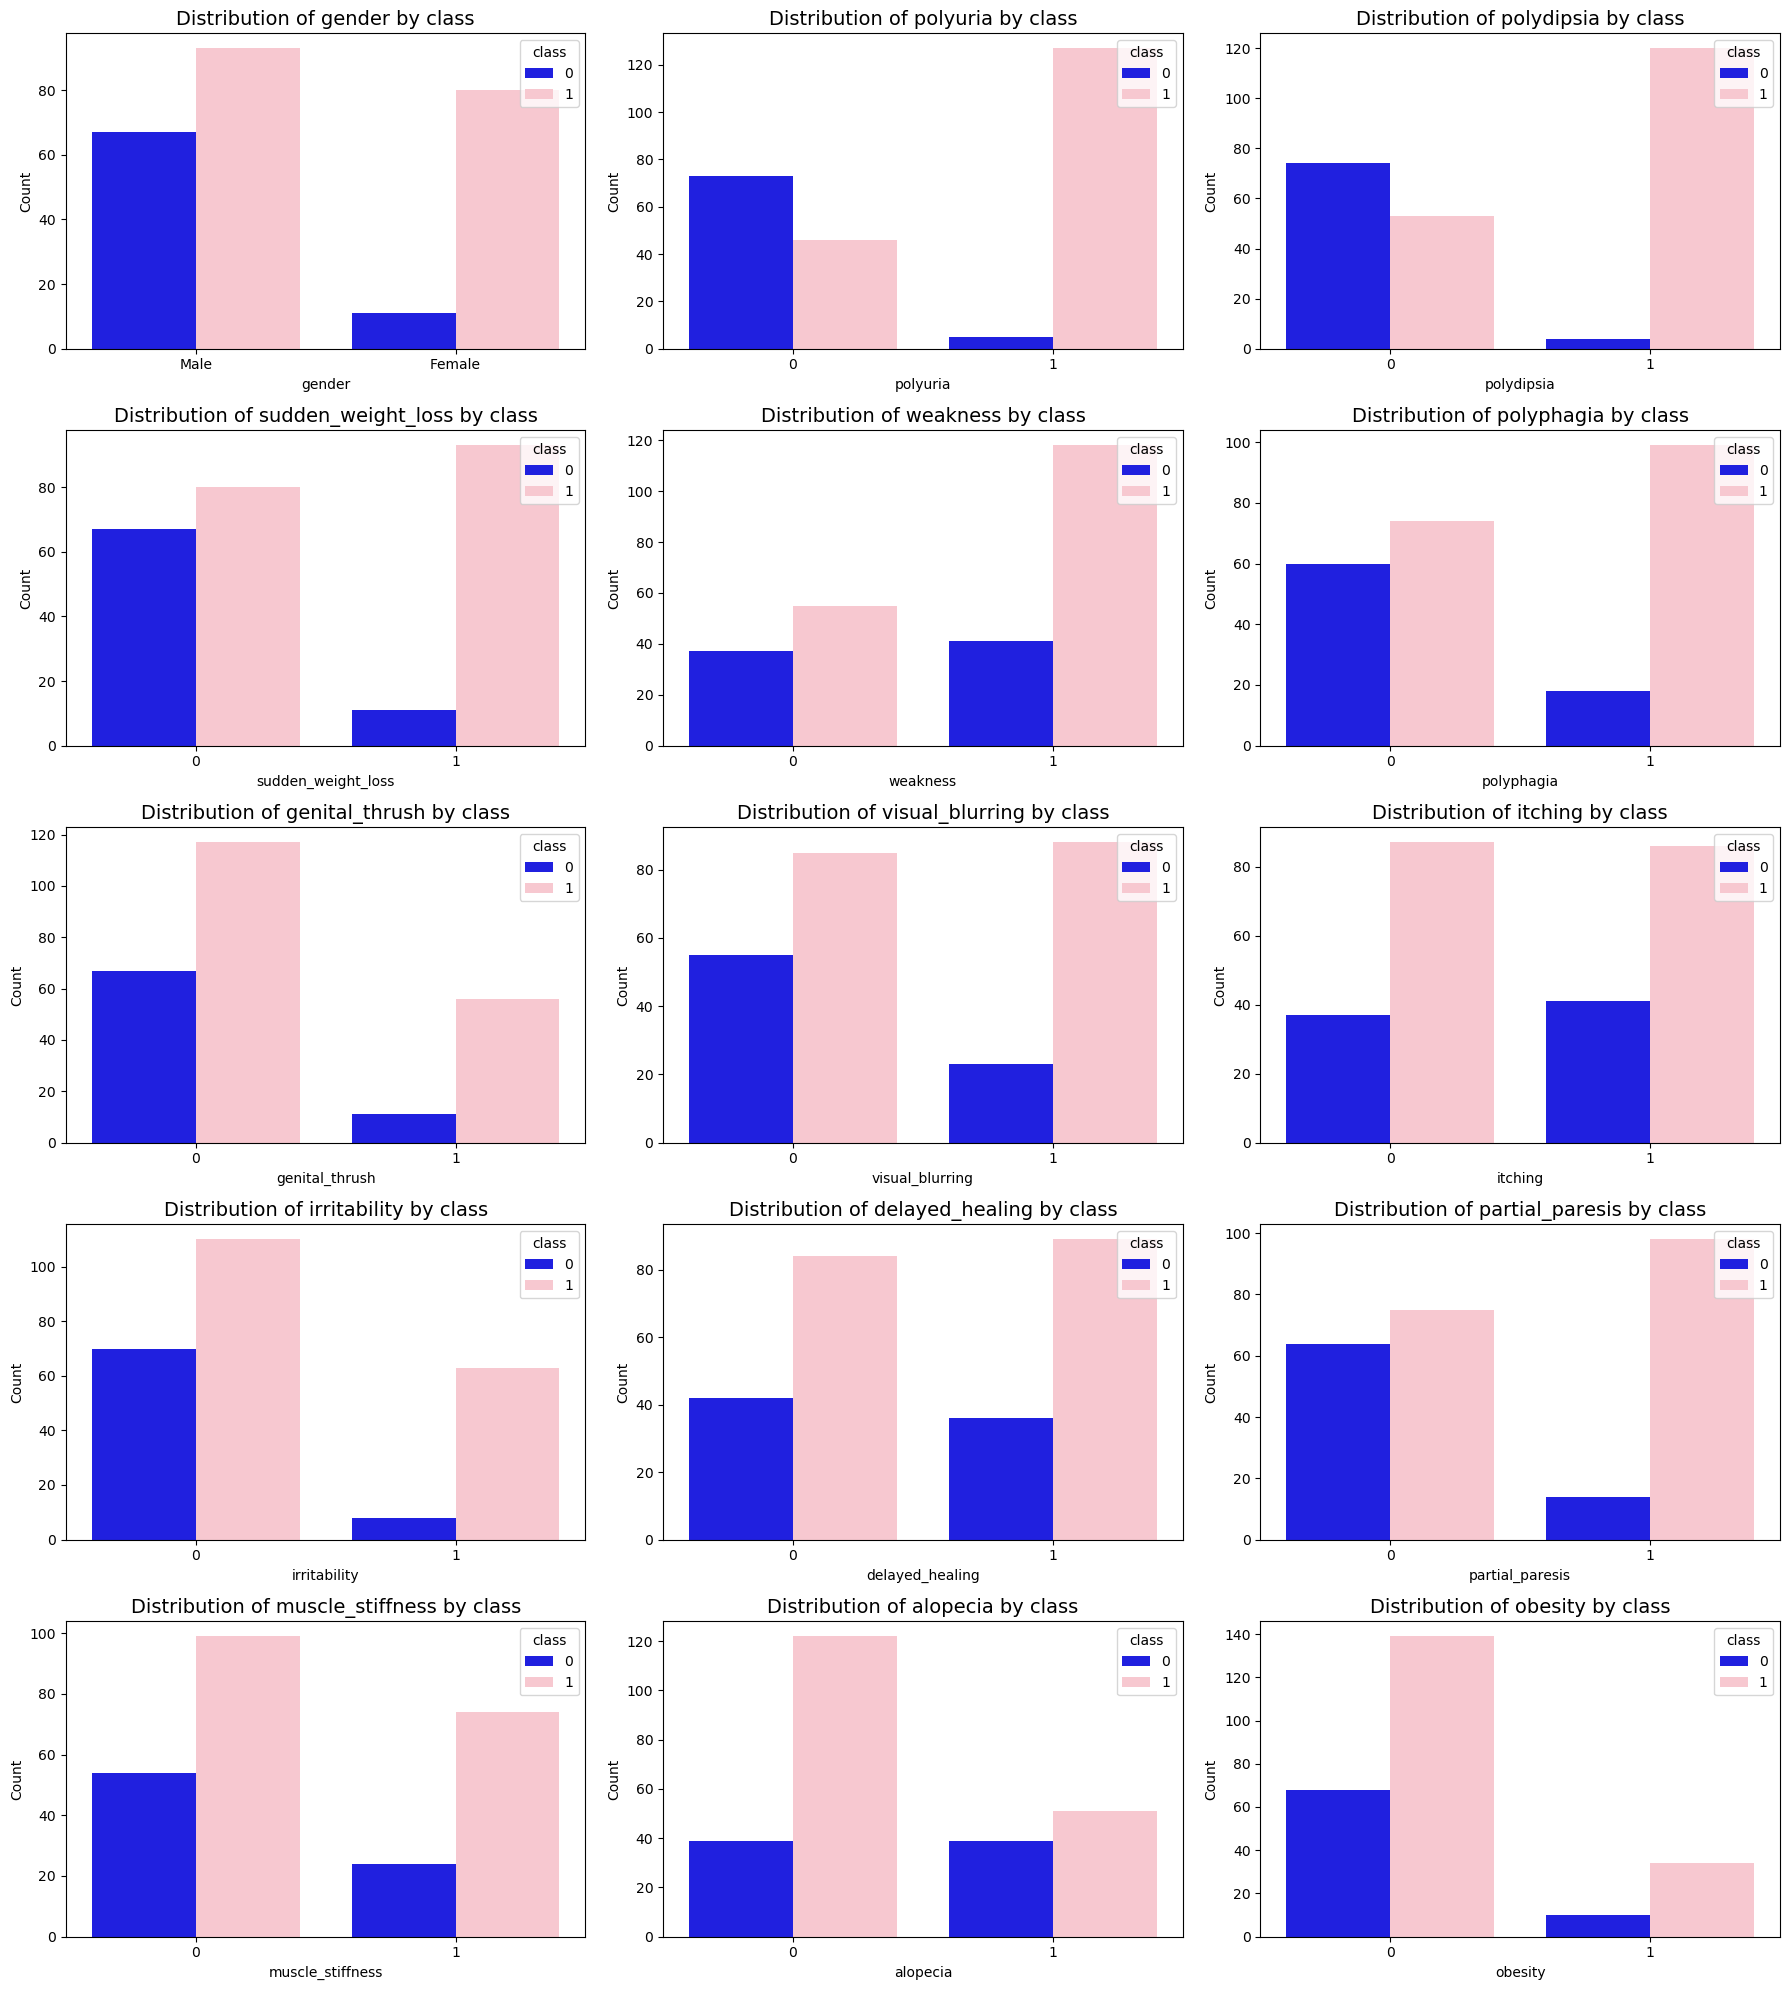

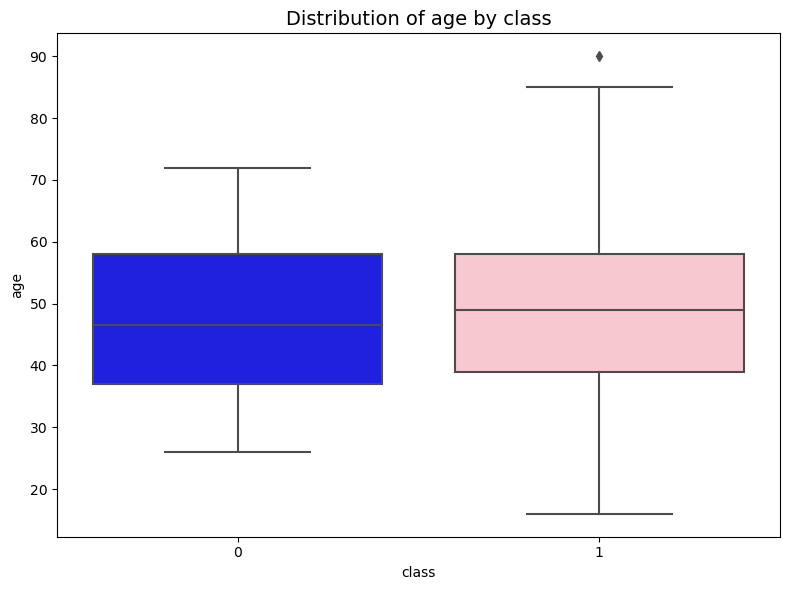

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
target_column = 'class'
categorical_columns = ['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
                       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability',
                       'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']
numerical_columns = ['age']
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
for i, col in enumerate(categorical_columns):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx]
    sns.countplot(data=data, x=col, hue=target_column, ax=ax, palette=['blue', 'pink'])
    ax.set_title(f'Distribution of {col} by {target_column}', fontsize=14)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend(title=target_column, loc='upper right')
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(8 * len(numerical_columns), 6))
if len(numerical_columns) == 1:
    axes = [axes]
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=data, x=target_column, y=col, ax=axes[i], palette=['blue', 'pink'])
    axes[i].set_title(f'Distribution of {col} by {target_column}', fontsize=14)
    axes[i].set_xlabel(target_column)
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


Genital Thrush vs. Other Symptoms: Genital thrush is heavily associated with Class 1, but unlike other symptoms, it has a clear differentiation between classes. This could suggest it’s a unique or more defining feature for Class 1 compared to other symptoms.

Irritability as a Negative Indicator for Class 1: Irritability is almost non-existent in Class 1, which is unique compared to other symptoms where both classes show some presence. This suggests irritability might be a distinct negative indicator for Class 1.

Obesity and Alopecia as Class 0 Traits: Both obesity and alopecia are notably more prevalent in Class 0, which might indicate that certain physical characteristics (like weight-related factors and hair loss) could be linked with the traits or conditions represented by Class 0.

Delayed Healing and Visual Blurring Closer Balance: Unlike other symptoms that lean towards one class, delayed healing and visual blurring show a somewhat balanced distribution across both classes, albeit with a slight tilt towards Class 1. This balance might suggest these symptoms are not definitive indicators on their own but could be useful in combination with others.

Age Distribution Consistency with Outliers in Class 1: The median ages for both classes are similar, but Class 1 has a few outliers in the older age range (70+), which are absent in Class 0. This could imply that whatever condition Class 1 represents may impact some individuals into older age more frequently than Class 0.

Partial Paresis as a Strong Distinction for Class 1: Partial paresis shows one of the strongest associations with Class 1, with nearly double the count compared to Class 0. This could be a key differentiator when identifying or diagnosing individuals within this class.

# Piecharts

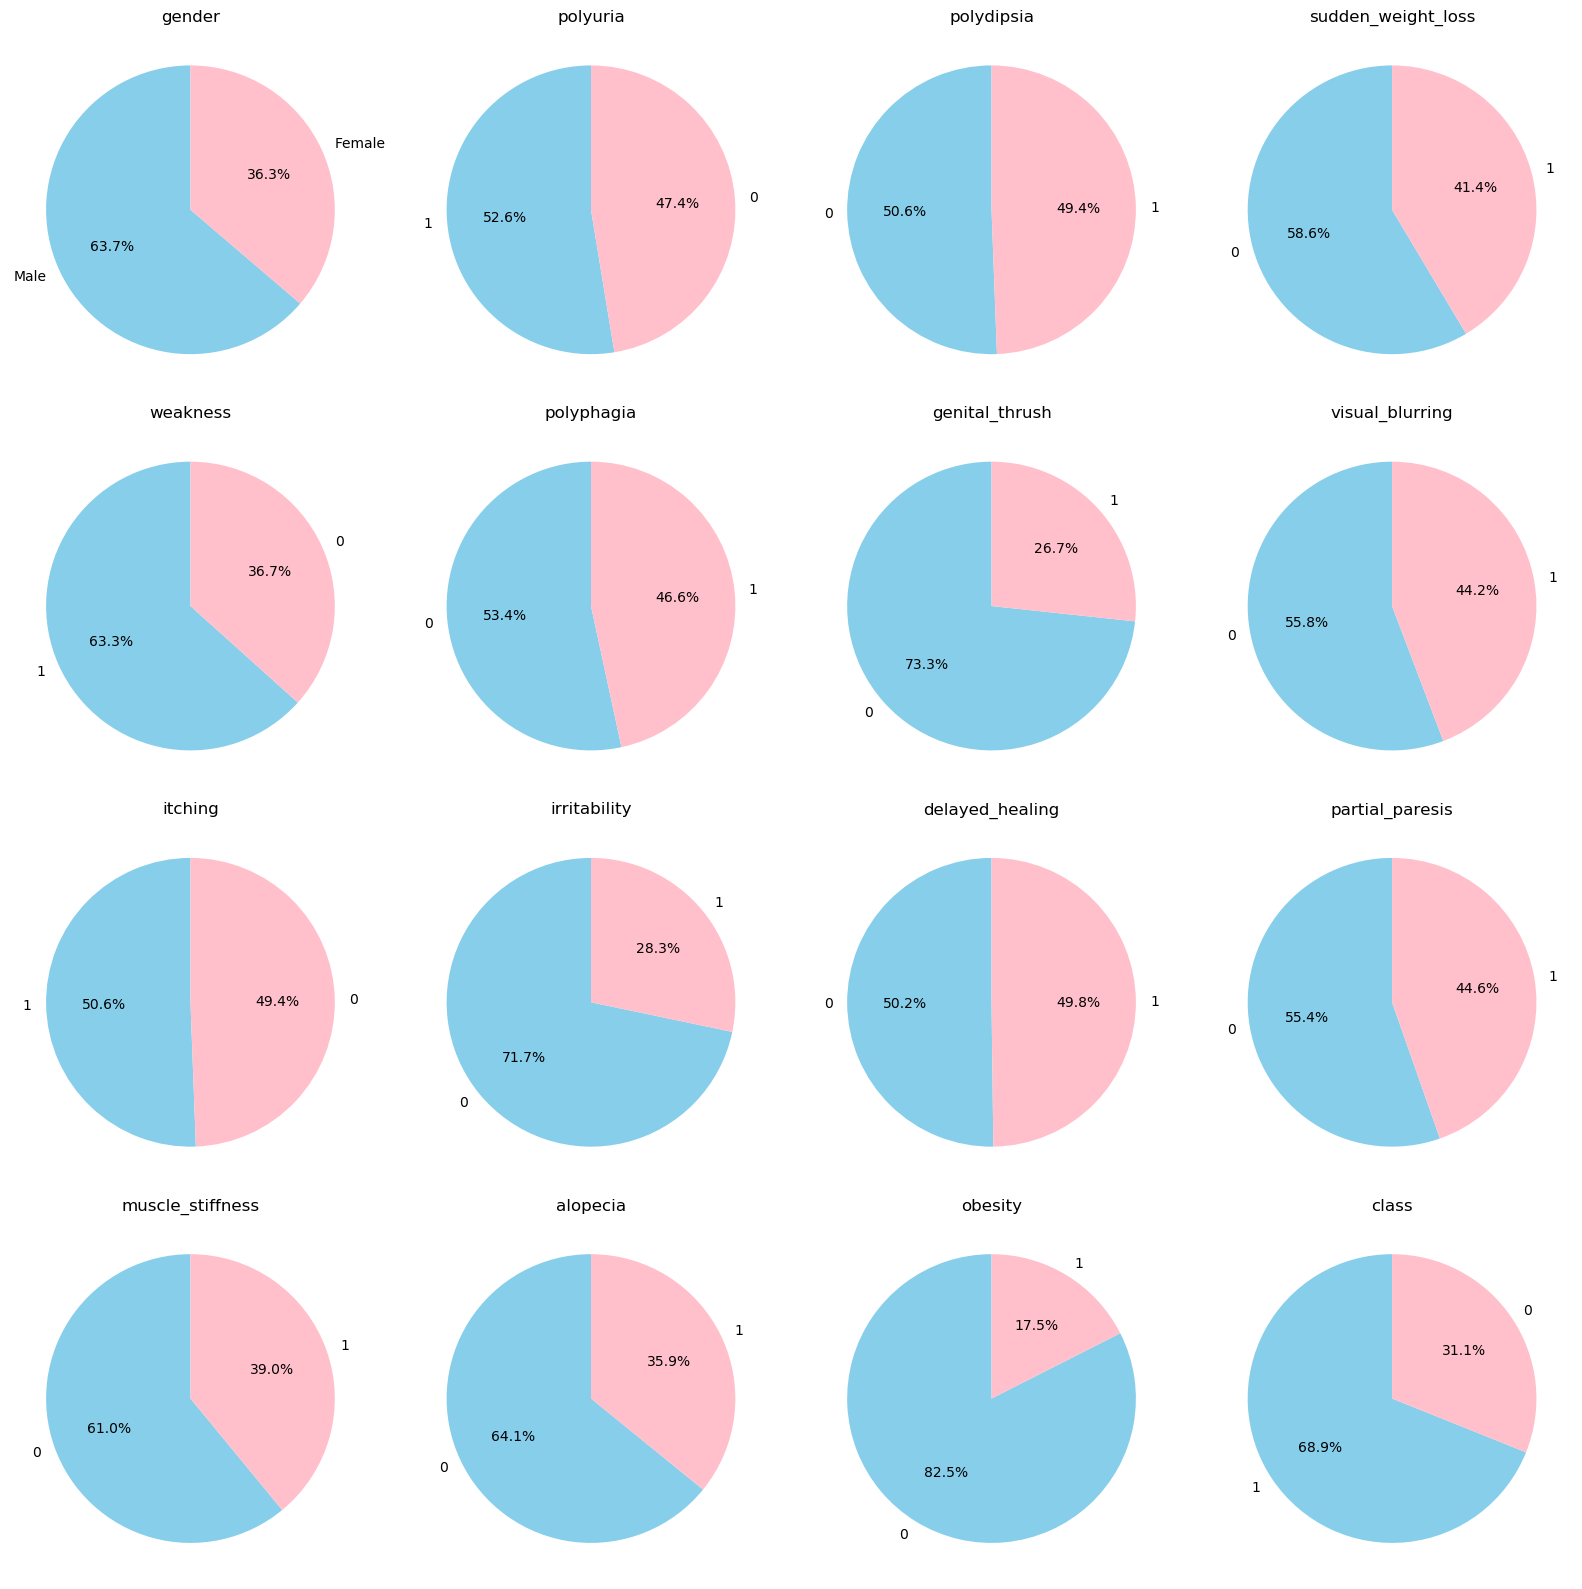

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten()
colors = ['skyblue', 'pink']
for i, column in enumerate([col for col in data.columns if col != 'age']):
    counts = data[column].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors[:len(counts)])
    axes[i].set_title(column, fontsize=12)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



This grid of pie charts shows the distribution of various health-related features, with blue and orange segments representing values 0 and 1, respectively. Key observations:

Gender: 63.1% male.
Polyuria, Polydipsia: Fairly balanced between 0 and 1.
Genital Thrush: 77.7% with value 0.
Irritability: 75.8% with value 0.
Alopecia: 65.6% with value 0.
Class: 61.5% with value 0, 38.5% with value 1.
Each pie chart shows the proportion of values for each symptom.

# Insights of Piecharts

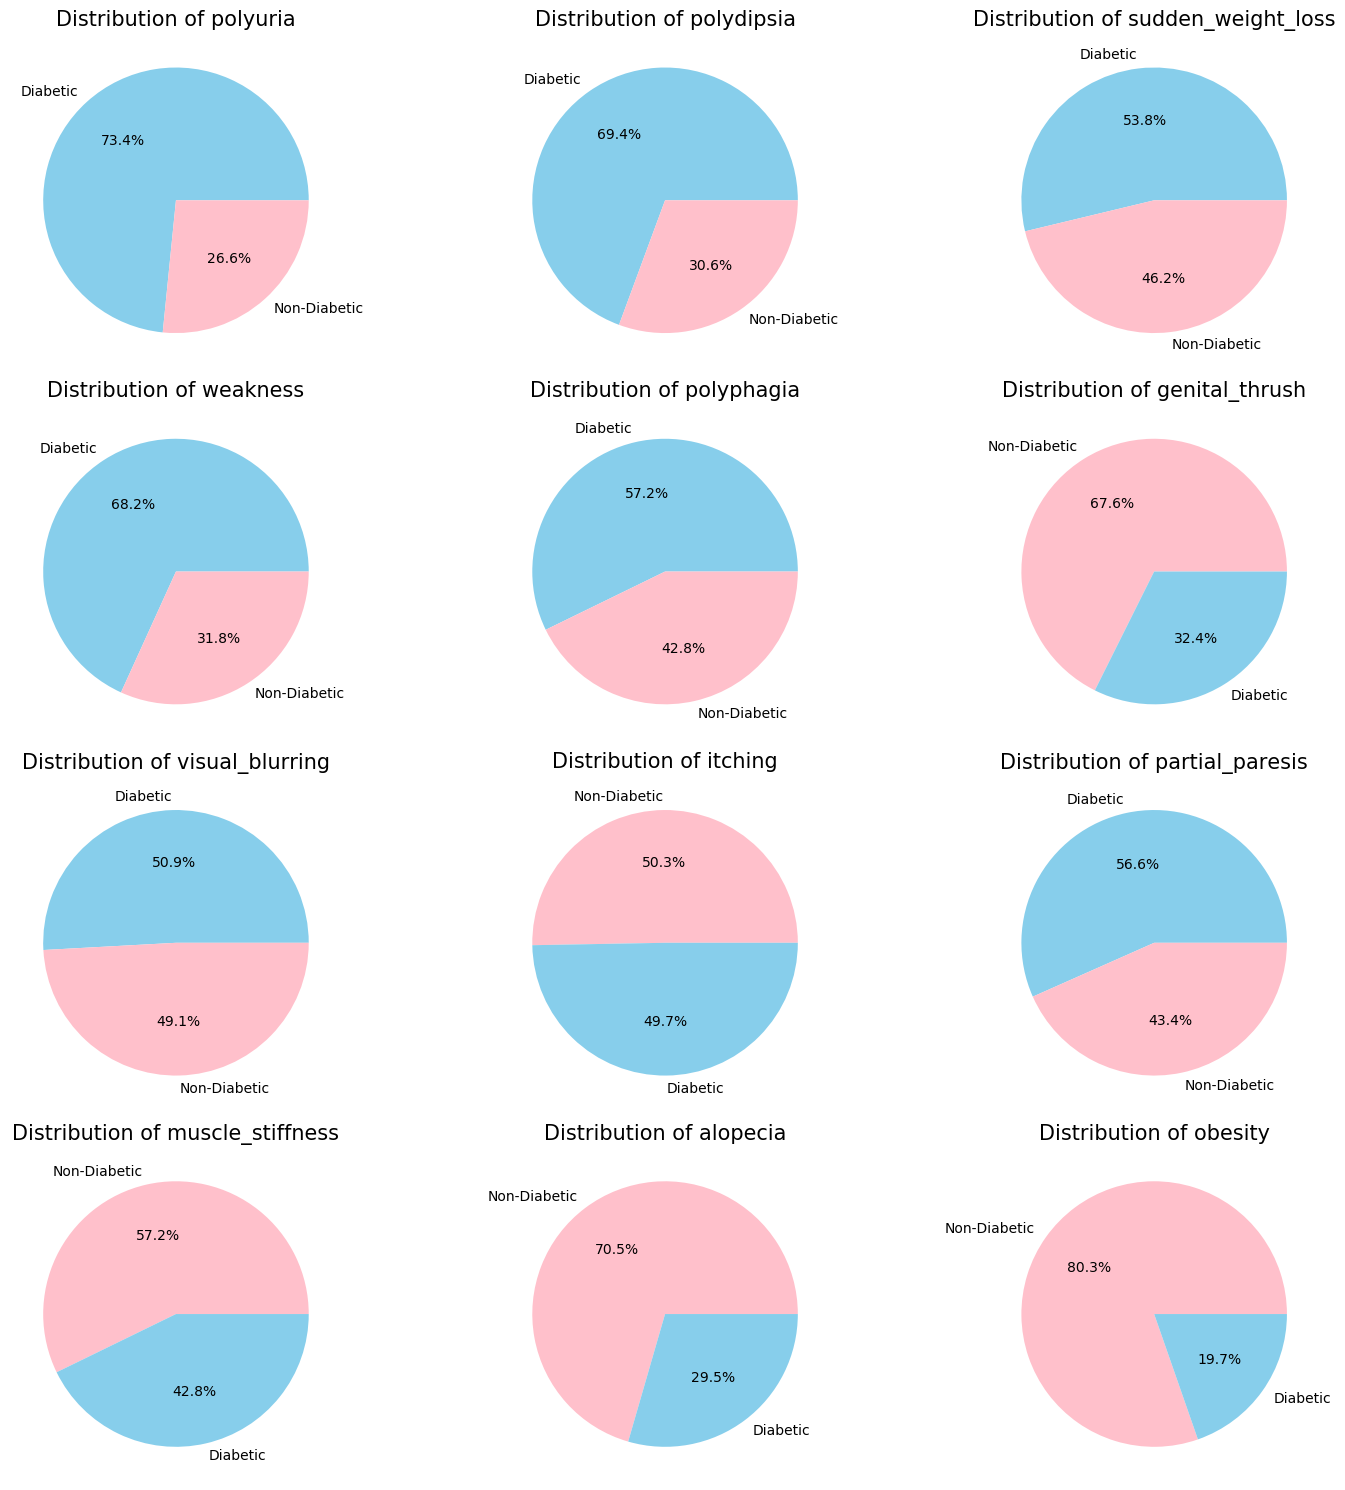

In [250]:
import matplotlib.pyplot as plt
conditions = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 
              'genital_thrush', 'visual_blurring', 'itching',
              'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']
diabetic_df = data[data['class'] == 1]
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten() 
color_map = {1: 'skyblue', 0: 'pink'}
for i, condition in enumerate(conditions):
    diabetic_counts = diabetic_df[condition].value_counts()
    colors = [color_map[label] for label in diabetic_counts.index]
    
    axes[i].pie(
        diabetic_counts, 
        labels=diabetic_counts.index.map({1: 'Diabetic', 0: 'Non-Diabetic'}), 
        autopct='%1.1f%%', 
        colors=colors  
    )
    axes[i].set_title(f"Distribution of {condition}", fontsize=15)
plt.tight_layout()
plt.show()




Polyuria, Polydipsia, Weakness: These symptoms have a strong association with diabetes, as the majority of affected individuals are diabetic (>68%).
Genital Thrush: Significantly more common in non-diabetics (74.1%), suggesting it is less indicative of diabetes.
Partial Paresis: Highly prevalent in diabetics (60%), indicating a strong link with diabetes.
Alopecia and Obesity: Predominantly found in non-diabetics (>75%), suggesting that these conditions might not be strong indicators of diabetes in this dataset.

# Bivariate Analysis

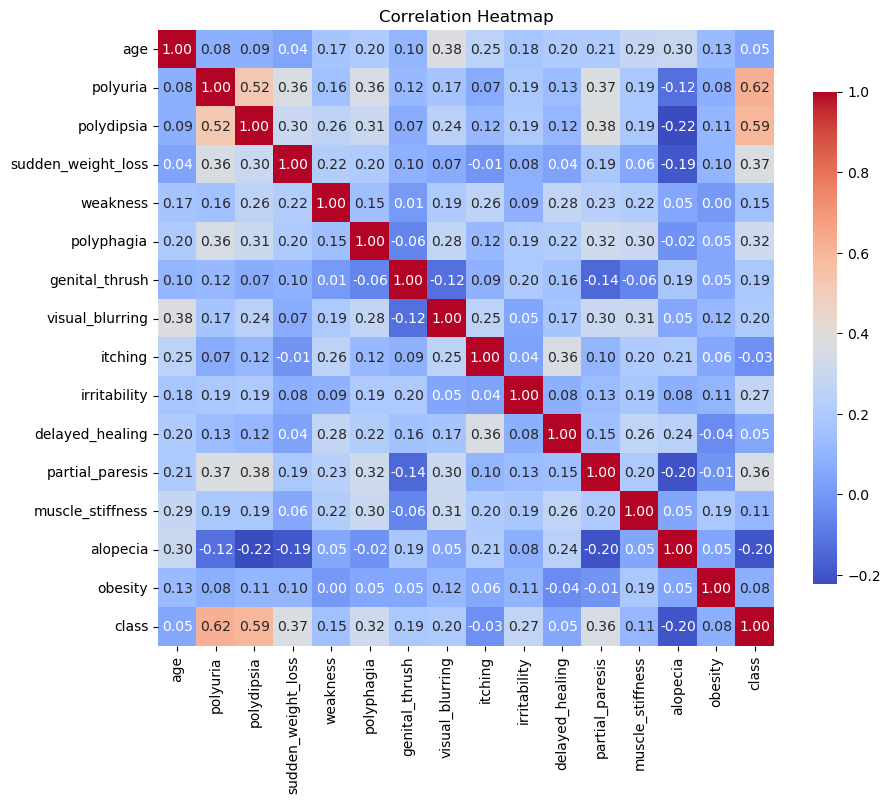

In [251]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (assuming the file path is correct)
data = pd.read_csv('C:\\Users\\dell\\OneDrive\\Desktop\\Rethasvi\\infosys\\diabetesdata.csv')  # Replace 'path_to_your_file.csv' with the actual file path

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up and plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap')
plt.show()


Correlation Heatmap Analysis
High Positive Correlation with Class (Target Variable):

Polyuria (0.62) and Polydipsia (0.59) are strongly correlated with the target variable (class), meaning these symptoms have a high association with the class label.
Moderate Positive Correlation with Class:

Partial Paresis (0.36) and Delayed Healing (0.26) also positively correlate with class, but to a lesser extent.
Negative Correlation with Class:

Gender (-0.31) and Alopecia (-0.2) have a moderate negative correlation with the class, indicating that these features are less likely to be associated with the target class.
Feature Interrelationships:

Polyuria and Polydipsia have a high positive correlation (0.52), showing that these symptoms often appear together.
Partial Paresis has moderate positive correlations with Polyuria (0.37), Polydipsia (0.38), and Delayed Healing (0.36).
Weak Correlations:

Many features, such as Weakness, Itching, and Genital Thrush, have very low or weak correlations with class and most other features.
Observations on Other Features:

Visual Blurring and Age have a slightly negative correlation with each other (-0.38).
Most features show weak correlations, indicating the limited association between symptoms in the dataset.
This heatmap provides insights into feature relationships and their impact on the target variable, useful for feature selection in model building.

# Dimentionality Reduction

# Principle  Component  Analysis(PCA)

Explained Variance Ratios: [0.21038589 0.13269542]


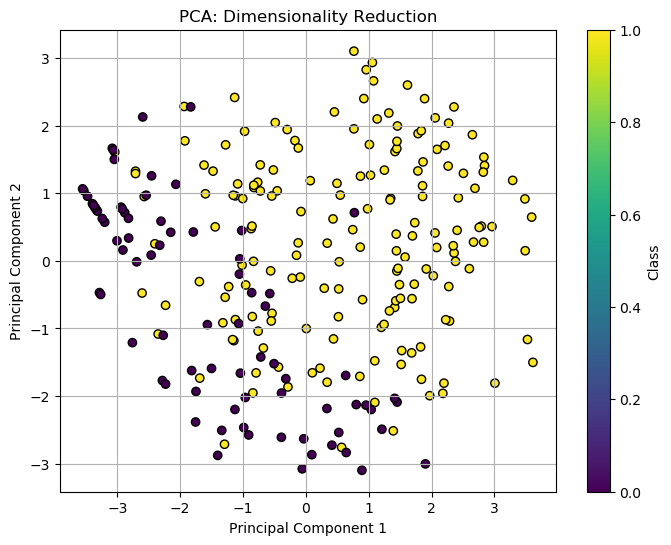

In [252]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
file_path = 'C:\\Users\\dell\\OneDrive\\Desktop\\Rethasvi\\infosys\\diabetesdata.csv'
data = pd.read_csv(file_path)
data['gender'] = LabelEncoder().fit_transform(data['gender'])
X = data.drop(columns=['class'])  
y = data['class']  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Dimensionality Reduction')
plt.colorbar(label='Class')
plt.grid()
plt.show()

__Preprocessing:__
Encodes the categorical column gender using LabelEncoder.
Standardizes the dataset using StandardScaler to prepare it for PCA.

__PCA Transformation:__
Reduces the dataset to 2 principal components.
Computes and displays the explained variance ratios for the components.

__Visualization:__
Creates a scatter plot of the two principal components, with points colored based on the target class.

* This approach simplifies the dataset for visualization or further analysis by reducing its dimensionality while retaining most of the variance.

* But PCA may not work for our project because it is difficult to understand the result.

* if we need to keep the original columns and make the results easy to understand then PCA may not suitable

# Feature Selection

In [253]:
import pandas as pd
df = pd.read_csv('C:\\Users\\dell\\OneDrive\\Desktop\\Rethasvi\\infosys\\diabetesdata.csv')
print(df.columns)

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')


In [254]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('C:\\Users\\dell\\OneDrive\\Desktop\\Rethasvi\\infosys\\diabetesdata.csv')
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender']) 
X = df.drop(columns=['class']) 
y = df['class'] 
X = X.apply(lambda x: x - x.min() + 1) 
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)
chi2_scores = chi2_selector.scores_
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)
rf_importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'RF Importance': rf_importances
})
feature_importance_sorted = feature_importance.sort_values(by='RF Importance', ascending=False)
print("Feature Importance (Ordered by Random Forest Importance):")
print(feature_importance_sorted)
chi2_sorted = feature_importance.sort_values(by='Chi2 Score', ascending=False)
chi2_features = chi2_sorted['Feature']
chi2_scores_sorted = chi2_sorted['Chi2 Score']
rf_sorted = feature_importance.sort_values(by='RF Importance', ascending=False)
rf_features = rf_sorted['Feature']
rf_importances_sorted = rf_sorted['RF Importance']

Feature Importance (Ordered by Random Forest Importance):
               Feature  Chi2 Score  RF Importance
2             polyuria   15.815884       0.218773
3           polydipsia   14.847927       0.185810
0                  age    3.208958       0.101612
1               gender    3.391535       0.068069
4   sudden_weight_loss    5.977242       0.054314
12     partial_paresis    5.567066       0.046713
10        irritability    2.867826       0.045753
8      visual_blurring    1.703893       0.041676
6           polyphagia    4.275987       0.037551
14            alopecia    1.666291       0.035572
11     delayed_healing    0.100477       0.031879
7       genital_thrush    1.416009       0.031129
9              itching    0.029060       0.029312
5             weakness    0.805475       0.025376
13    muscle_stiffness    0.557268       0.025035
15             obesity    0.213550       0.021426


Feature selection is the process of identifying the most relevant features in a dataset. There are several methods for feature selection, including statistical tests, tree-based methods, and regularization techniques.
* __Chi-Square Test__
It is a statistical test to measure the dependency between two categorical variables.
Evaluates whether the observed frequency of outcomes differs significantly from what we would expect under independence.
We can use it for feature selection in datasets with categorical features and target variables.
It requires non-negative values, so preprocessing is often necessary.
* __Random Forest__
It is an ensemble machine learning algorithm that uses multiple decision trees to make predictions or classifications.
It measures how much each feature reduces impurity (e.g., Gini index) across all trees.
It can handle numerical and categorical data directly.
It accounts for interactions and nonlinear relationships.
It is robust to overfitting when tuned correctly.
* __Why Random Forest is Important__
* It captures complex relationships between features and the target variable.
* Works well with mixed data types and can handle missing values.
* Provides more realistic importance rankings by considering interactions and redundancies.
* Often preferred for feature selection in practice because its importance scores reflect the contribution of features to model performance.

# Scaling

In [255]:
scaler = MinMaxScaler()
X_train_log_reg = scaler.fit_transform(X_train)
X_test_log_reg = scaler.transform(X_test)

* We scale only age and not other features because age is a numerical feature that can have a wide range.Scaling ensures that all features are on the same scale, preventing any feature from dominating the model due to its larger range. It improves model convergence, performance, and ensures fair contributions from each feature.

#  Feature Importance (Global Comparison)

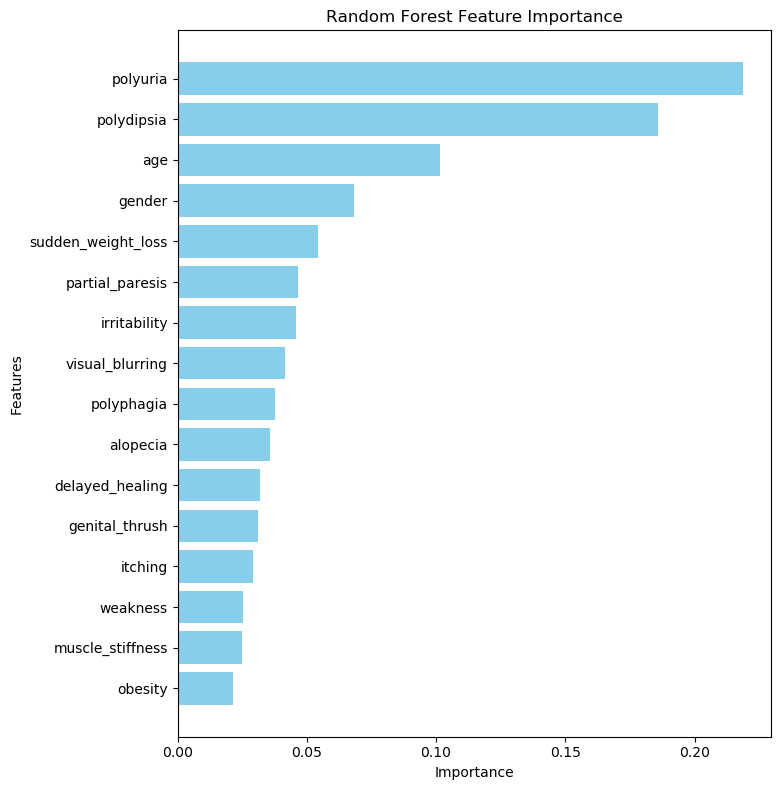

In [256]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
df = pd.read_csv('C:\\Users\\dell\\OneDrive\\Desktop\\Rethasvi\\infosys\\diabetesdata.csv')
df['gender'] = df['gender'].astype('category').cat.codes
X = df.drop(columns=['class'])  
y = df['class'] 
X_positive = X.apply(lambda x: x - x.min() + 1)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)
rf_importances = rf_model.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='skyblue')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

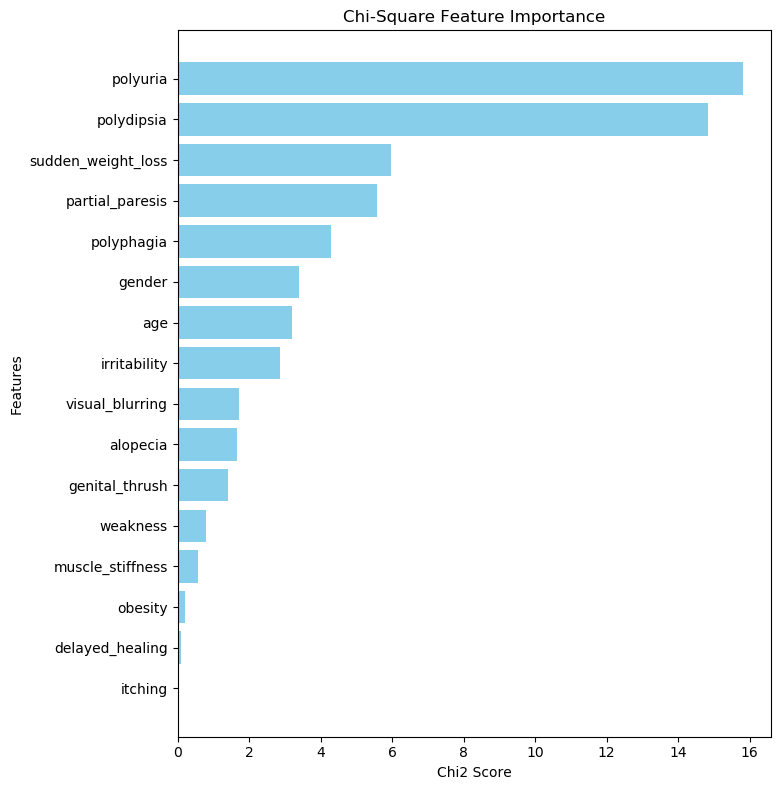

In [257]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
df = pd.read_csv('C:\\Users\\dell\\OneDrive\\Desktop\\Rethasvi\\infosys\\diabetesdata.csv')
df['gender'] = df['gender'].astype('category').cat.codes
X = df.drop(columns=['class']) 
y = df['class']  
X_positive = X.apply(lambda x: x - x.min() + 1)
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_positive, y)
chi2_scores = chi2_selector.scores_
chi2_importance_df = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores})
chi2_importance_df = chi2_importance_df.sort_values(by='Chi2 Score', ascending=False)
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 2)
plt.barh(chi2_importance_df['Feature'], chi2_importance_df['Chi2 Score'], color='skyblue')
plt.title('Chi-Square Feature Importance')
plt.xlabel('Chi2 Score')
plt.ylabel('Features')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

__Description:__
Rank all features by importance to identify the most impactful ones, regardless of the method used.

__Purpose:__
Provides a clear view to compare importance scores across methods.

__Application:__
Use a Random Forest model or other tree-based models to generate importance scores.

__Key Difference__
* Random Forest: Based on model performance and considers feature interactions.
* Chi-Square: Purely statistical, based on independence testing without using a model.

# Modelling
__We Are going to apply following models on our Dataset:__
- Logistic Regression (LR)
- Support Vector Machine (SVM)
- Random Forest (RF)
- Decision Tree (DT)
- Extra Trees (ET)
- Gradient Boosting (GB)

* Each model was checked on Four metrics: Accuracy, Precision, Recall , and F1 Score.

__Accuracy:__ How often the model is correct.

__Precision:__ How many predicted positives are actually correct.

__Recall:__ How many actual positives the model correctly identified.

__F1 Score:__ F1 score balances precision and recall for accurate positive predictions

In [258]:
import pandas as pd
df = pd.read_csv('C:\\Users\\dell\\OneDrive\\Desktop\\Rethasvi\\infosys\\diabetesdata.csv') 
print("Column names:", df.columns.tolist())

Column names: ['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class']


# Train/Test Split

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning

In [260]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('C:\\Users\\dell\\OneDrive\\Desktop\\Rethasvi\\infosys\\diabetesdata.csv')
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})  
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [261]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
lr = LogisticRegression(max_iter=10000)
param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)
grid_search_lr.fit(X, y)
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

Best parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}


In [262]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.8235294117647058
Precision: 0.825
Recall: 0.9428571428571428
F1 Score: 0.88


# Support Vector Machine

In [263]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search_svm.fit(X, y)
print("Best parameters for SVM:", grid_search_svm.best_params_)

Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [264]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))


Support Vector Machine:
Accuracy: 0.9215686274509803
Precision: 0.918918918918919
Recall: 0.9714285714285714
F1 Score: 0.9444444444444445


# Random Forest

In [265]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search_rf.fit(X, y)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [266]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.9215686274509803
Precision: 0.918918918918919
Recall: 0.9714285714285714
F1 Score: 0.9444444444444445


# Decision Tree

In [267]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()
param_grid = {'max_depth': [10, 20], 'min_samples_split': [2, 5], 'criterion': ['gini', 'entropy']}
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search_dt.fit(X, y)
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}


In [268]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))


Decision Tree:
Accuracy: 0.8823529411764706
Precision: 0.8918918918918919
Recall: 0.9428571428571428
F1 Score: 0.9166666666666667


# Extra Trees

In [269]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
et = ExtraTreesClassifier()
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}
grid_search_et = GridSearchCV(estimator=et, param_grid=param_grid, cv=5)
grid_search_et.fit(X, y)
print("Best parameters for Extra Trees:", grid_search_et.best_params_)

Best parameters for Extra Trees: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [270]:
from sklearn.ensemble import ExtraTreesClassifier
et_model = ExtraTreesClassifier()
et_model.fit(X_train, y_train)
y_pred_et = et_model.predict(X_test)
print("\nExtra Trees:")
print("Accuracy:", accuracy_score(y_test, y_pred_et))
print("Precision:", precision_score(y_test, y_pred_et))
print("Recall:", recall_score(y_test, y_pred_et))
print("F1 Score:", f1_score(y_test, y_pred_et))


Extra Trees:
Accuracy: 0.9215686274509803
Precision: 0.918918918918919
Recall: 0.9714285714285714
F1 Score: 0.9444444444444445


# Gradient Boosting

In [271]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingClassifier()
param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 5]}
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5)
grid_search_gb.fit(X, y)
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)

Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [272]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("\nGradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb ))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))


Gradient Boosting:
Accuracy: 0.9019607843137255
Precision: 0.8947368421052632
Recall: 0.9714285714285714
F1 Score: 0.9315068493150684


# Combining all the results

In [273]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
data = pd.read_csv('C:\\Users\\dell\\OneDrive\\Desktop\\Rethasvi\\infosys\\diabetesdata.csv')
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0}) 
X = data.drop('class', axis=1) 
y = data['class']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  
    y_pred = model.predict(X_test_scaled)  
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))  
    results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))  
    results['F1 Score'].append(f1_score(y_test, y_pred, average='weighted')) 
results_df = pd.DataFrame(results)
print(results_df)

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.823529   0.822861  0.823529  0.813072
1  Support Vector Machine  0.921569   0.921947  0.921569  0.920044
2           Random Forest  0.941176   0.940959  0.941176  0.940642
3           Decision Tree  0.843137   0.842132  0.843137  0.836172
4             Extra Trees  0.921569   0.921947  0.921569  0.920044
5       Gradient Boosting  0.901961   0.903628  0.901961  0.898904


In [274]:
top_models = results_df.sort_values(by='Accuracy', ascending=False).head(2)
print("\nTop  models with the highest accuracy:")
print(top_models)


Top  models with the highest accuracy:
                    Model  Accuracy  Precision    Recall  F1 Score
2           Random Forest  0.941176   0.940959  0.941176  0.940642
1  Support Vector Machine  0.921569   0.921947  0.921569  0.920044


__Hyperparameter tuning:__
* It refers to the process of selecting the best values for the hyperparameters of a machine learning model.
* For hyperparameter tuning in our code, we used a GridSearchCV method.
* GridSearchCV tests different settings for a model, checks which one works best using your data, and picks the winner for the most accurate predictions.

__Model Evaluation:__

After training, the best model was evaluated on the test set, and the classification report was generated, showing performance metrics such as precision, recall, and F1-score.

__Outcome:__

The best hyperparameters were printed, and the model's performance was assessed using the classification report.

# Evaluation metrics

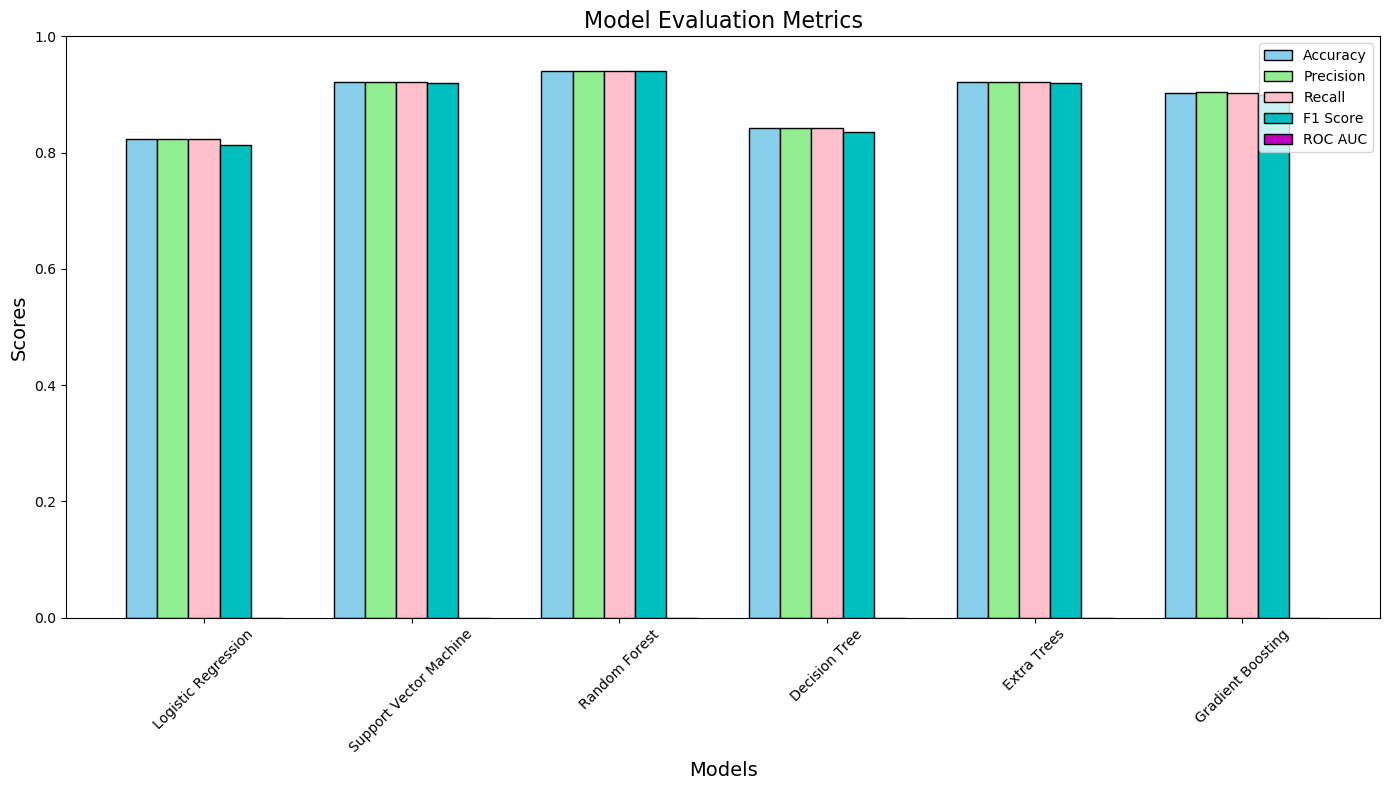

In [276]:
import matplotlib.pyplot as plt  
import pandas as pd  
results_df.columns = results_df.columns.str.strip()

plt.figure(figsize=(14, 8))
bar_width = 0.15
x = range(len(results_df))
plt.bar([p - 2 * bar_width for p in x], results_df.get('Accuracy', [0]*len(x)), width=bar_width, label='Accuracy', color='skyblue', edgecolor="black")
plt.bar([p - bar_width for p in x], results_df.get('Precision', [0]*len(x)), width=bar_width, label='Precision', color='lightgreen', edgecolor="black")
plt.bar(x, results_df.get('Recall', [0]*len(x)), width=bar_width, label='Recall', color='pink', edgecolor="black")
plt.bar([p + bar_width for p in x], results_df.get('F1 Score', [0]*len(x)), width=bar_width, label='F1 Score', color='c', edgecolor="black")
plt.bar([p + 2 * bar_width for p in x], results_df.get('ROC AUC', [0]*len(x)), width=bar_width, label='ROC AUC', color='m', edgecolor="black")

plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Model Evaluation Metrics', fontsize=16)
plt.xticks(x, results_df['Model'], rotation=45)
plt.ylim(0, 1) 
plt.legend()
plt.tight_layout()
plt.show()


__Classification Report:__
The classification_report function provides a summary of the key evaluation metrics for the performance of the classification model. The report includes the following:

__Precision:__
Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
High precision indicates a low false positive rate, meaning the model is good at predicting the positive class.

__Recall:__
Recall is the ratio of correctly predicted positive observations to all observations in the actual positive class.
High recall indicates the model captures most of the positive cases.

__F1-Score:__
The F1-score is the harmonic mean of precision and recall. It provides a balance between the two metrics, especially when there is an uneven class distribution.

__Accuracy:__
The overall proportion of correct predictions (true positives and true negatives) out of all predictions.


These metrics help assess how well the model classifies the data, especially for imbalanced datasets like the diabetes dataset.

* Based on the analysis, the Random Forest model is the best choice:

__Accuracy:__ It has achieved highest score (0.941176)

__Precision:__ High precision ensures few false positives.It achieved highest precision (0.940959) 

__Recall:__ High recall means most positive cases are captured.It achieved highest recall (0.941176)

__F1-Score:__ The highest F1-Score balances precision and recall perfectly.It achieved highest f1-score (0.940642)

# Conclusion

Based on the analysis __Random Forest__ model is the best

__Reason:__ 
 * It gives best overall performance
 * It achieves highest accuracy (0.941176), precision(0.940959), recall(0.941176) abd F1-Score (0.940642) among all models. 
 * It ensures reliable predictions and capturing the majority of true positives.
 * Random Forest is suitable for small datasets
 * It reduces the risk of overfitting while effectively handling small datasets.
 * Compared to remaining models, Random Forest is computationally less complex, making it faster and easier to implement without sacrificing performance.

* Hence,Random Forest is the best choice due to its performance and efficiency for small datasets, ensuring optimal predictions with minimal complexity.Where as other models Extra Trees, SVM, and Decision Tree fall short in overall performance metrics compared to Random Forest.